# Heart Attack Risk

## 1. Import Packages
* TensorFlow
* Keras
* NumPy
* Matplotlib
* SciKit-Learn
* Pandas

In [2]:
# IMPORT PACKAGES
import tensorflow as tf
print('tensorflow version: ' + tf.__version__)

# Keras and Sequential model and Dense layers
import keras as ks
from keras.models import Sequential
from keras.layers import Dense
print('keras version: ' + ks.__version__)

# NumPy
import numpy as np
print('numpy version: ' + np.__version__)

# MatPlotLib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns
print('seaborn version: ' + sns.__version__)

# Scikit-Learn Preprocessing
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Pandas
import pandas as pd
print('pandas version: ' + pd.__version__)

tensorflow version: 2.0.0
keras version: 2.3.1
numpy version: 1.19.2


Using TensorFlow backend.


seaborn version: 0.11.2
pandas version: 1.1.5


## 2. Data Acquisition and Exploration

Data:
* Name: Heart Attack Analysis & Prediction Dataset
* URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset 

Futhermore, more detail about the source of the dataset above from, here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease 

In [3]:
data = pd.read_csv('./dataset/heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Lets understand any correlations through correlation heat map. Specifically, let us inspect correlations with respect to `output` variable



<AxesSubplot:>

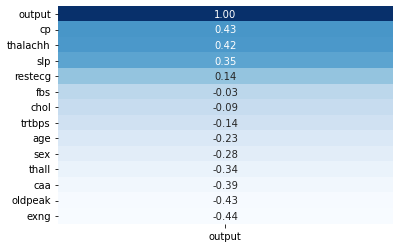

In [6]:
sns.heatmap(data=data.corr()[['output']].sort_values( by='output', ascending=False), annot=True, cmap='Blues', cbar=False, fmt=f'.2f')

## 4. Data Preprocessing


### Normalize the data
Normalize the data to mitigate variables overpowering others and introducing bias.

| Variable    | Description |
| ----------- | ----------- |
|`age`|**numeric** - Age of the patient|
|`sex`|**categorical** - Sex of the patient (0 = female, 1 = male)|
|`cp`|**categorical** - Chest Pain type chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)|
|`trtbps`|**numeric** - resting blood pressure (in mm Hg)|
|`chol`|**numeric** - cholesterol in mg/dl fetched via BMI sensor|
|`fbs`|**categorical** - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)|
|`restecg`|**categorical** - resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)|
|`thalachh`|**numeric** - maximum heart rate achieved|
|`exng`|**categorical** - exercise induced angina (1 = yes; 0 = no)|
|`oldpeak`|**numerical** - ST depression induced by exercise relative to rest
|`slp`|**categorical** - the slope of the peak exercise ST segment (0 = downsloping, 1 = flat; 2 = upsloping)
|`caa`|**numeric** - number of major vessels (0-3)|
|`thall`|**numeric** -  ??? unsure but appears to denote normal vs fixed defect vs reversable defect|
|`output`|**categorical** -  classification (0 = less chance of heart attack, 1 = more chance of heart attack)|

1. First, seperate out data into the input feature dataset and the output label dataset

In [7]:
data_features = data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
data_features.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
data_labels = data[['output']]
data_labels.head()

,output
0,1
1,1
2,1
3,1
4,1


2. Now split the "features" data into numeric and categorical tables for preprocessing

In [9]:
data_features_numerical = data_features[['age','trtbps','chol','thalachh','oldpeak','caa','thall']]
data_features_numerical.head()

,age,trtbps,chol,thalachh,oldpeak,caa,thall
0,63,145,233,150,2.3,0,1
1,37,130,250,187,3.5,0,2
2,41,130,204,172,1.4,0,2
3,56,120,236,178,0.8,0,2
4,57,120,354,163,0.6,0,2


In [10]:
data_features_categorical = data_features[['sex','cp','fbs','restecg','exng','slp']]
data_features_categorical.head()

,sex,cp,fbs,restecg,exng,slp
0,1,3,1,0,0,0
1,1,2,0,1,0,0
2,0,1,0,0,0,2
3,1,1,0,1,0,2
4,0,0,0,1,1,2


2. **(cont'd)** next step we want to replace categorical field values with string values --> later when we one-hot encode these columns the generated columns will include the string value in the column header

In [11]:
# temporarily disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# process categorical columns
data_features_categorical['sex'] = data_features_categorical['sex'].map({0: 'female', 1: 'male'})
data_features_categorical['cp'] = data_features_categorical['cp'].map({0: 'typical-angina', 1: 'atypical-angina', 2: 'nonanginal', 3: 'asymptomatic'})
data_features_categorical['fbs'] = data_features_categorical['fbs'].map({0: 'lte-120', 1: 'gt-120'})
data_features_categorical['restecg'] = data_features_categorical['restecg'].map({0: 'normal', 1: 'st-abnormality', 2: 'left-ventricular-atrophy'})
data_features_categorical['exng'] = data_features_categorical['exng'].map({0: 'no', 1: 'yes'})
data_features_categorical['slp'] = data_features_categorical['slp'].map({0: 'downsloping', 1: 'flat', 2: 'upsloping'})

#  enable  SettingWithCopyWarning for subsequent code
pd.options.mode.chained_assignment = 'warn'

data_features_categorical.head()

,sex,cp,fbs,restecg,exng,slp
0,male,asymptomatic,gt-120,normal,no,downsloping
1,male,nonanginal,lte-120,st-abnormality,no,downsloping
2,female,atypical-angina,lte-120,normal,no,upsloping
3,male,atypical-angina,lte-120,st-abnormality,no,upsloping
4,female,typical-angina,lte-120,st-abnormality,yes,upsloping


3. Normalize numeric attributes so that numeric values are between [0.0,1.0]. This is needed so that numerical fields with large representations do not outweigh numerical fields with smaller representations (e.g., Heart Rate outweighing other variables as it can range above 100+).

In [12]:
data_features_numerical_normalized = (data_features_numerical-data_features_numerical.min())/(data_features_numerical.max()-data_features_numerical.min())
print("\nINPUT FEATURES - numerical - (normalized [0,1]")
print(data_features_numerical_normalized.head())
print(data_features_numerical_normalized.shape)


INPUT FEATURES - numerical - (normalized [0,1]
        age    trtbps      chol  thalachh   oldpeak  caa     thall
0  0.708333  0.481132  0.244292  0.603053  0.370968  0.0  0.333333
1  0.166667  0.339623  0.283105  0.885496  0.564516  0.0  0.666667
2  0.250000  0.339623  0.178082  0.770992  0.225806  0.0  0.666667
3  0.562500  0.245283  0.251142  0.816794  0.129032  0.0  0.666667
4  0.583333  0.245283  0.520548  0.702290  0.096774  0.0  0.666667
(303, 7)


4. Encode categorical columns using one-hot encoding

In [13]:
# convert output label to one-hot label
data_features_categorical_onehot = pd.get_dummies(data_features_categorical, columns= ['sex','cp','fbs','restecg','exng','slp'])
print("\nINPUT FEATURES - categorical - (one-hot)")
print(data_features_categorical_onehot.head())
print(data_features_categorical_onehot.shape)


INPUT FEATURES - categorical - (one-hot)
   sex_female  sex_male  cp_asymptomatic  cp_atypical-angina  cp_nonanginal  \
0           0         1                1                   0              0   
1           0         1                0                   0              1   
2           1         0                0                   1              0   
3           0         1                0                   1              0   
4           1         0                0                   0              0   

   cp_typical-angina  fbs_gt-120  fbs_lte-120  \
0                  0           1            0   
1                  0           0            1   
2                  0           0            1   
3                  0           0            1   
4                  1           0            1   

   restecg_left-ventricular-atrophy  restecg_normal  restecg_st-abnormality  \
0                                 0               1                       0   
1                             

5. rejoin the categorical and numerical data into common dataframe

In [14]:
data_features_preprocessed = pd.concat([data_features_numerical_normalized, data_features_categorical_onehot], axis=1)
data_features_preprocessed.head()

,age,trtbps,chol,thalachh,oldpeak,caa,thall,sex_female,sex_male,cp_asymptomatic,...,fbs_gt-120,fbs_lte-120,restecg_left-ventricular-atrophy,restecg_normal,restecg_st-abnormality,exng_no,exng_yes,slp_downsloping,slp_flat,slp_upsloping
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,0.333333,0,1,1,...,1,0,0,1,0,1,0,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,0.666667,0,1,0,...,0,1,0,0,1,1,0,1,0,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,0.666667,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,0.562500,0.245283,0.251142,0.816794,0.129032,0.0,0.666667,0,1,0,...,0,1,0,0,1,1,0,0,0,1
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.666667,1,0,0,...,0,1,0,0,1,0,1,0,0,1


6. With data cleaned/preprocessed reanalyze correlations

<AxesSubplot:>

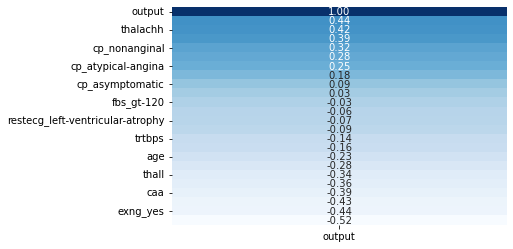

In [15]:
temp = pd.concat([data_features_preprocessed, data_labels], axis=1)
sns.heatmap(data=temp.corr()[['output']].sort_values( by='output', ascending=False), annot=True, cmap='Blues', cbar=False, fmt=f'.2f')

7. TEST - convert output to 2 neurons


In [16]:
data_labels['output'] = data_labels['output'].map({0: 'decrease-chance', 1: 'increased-chance'})
data_labels_onehot = pd.get_dummies(data_labels, columns= ['output'])
data_labels_onehot.head()

/Users/luisretana/opt/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,output_decrease-chance,output_increased-chance
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## 5. Model Training and Testing
Architecture
* Input:
    * 23 neurons representing all columns from `data_features_preprocessed` table
* Hidden:
    * 1 layer with 50 neurons
* Output:
    * 2 neurons representing `output` column from `data_labels` that has been one-hot encoded in `data_labels-onehot`

Hyper-parameters
* Training Batch Sizes: 60
* Max Training Epochs: 1000
* Number Hidden Layers: 1
* Number Neurons per Hidden Layer: 50

Activation Functions:
* Hidden Layer(s): `relu`
* Output Layer: `softmax`

Loss Functions:
* `categorical_crossentropy`

In [17]:
# COMPILE NEURAL NETWORK
INPUT_SIZE = data_features_preprocessed.shape[1]
OUTPUT_SIZE = data_labels_onehot.shape[1]
HIDDEN_SIZE = 50
print(f"\nCompiling NN with:\n\t{INPUT_SIZE} input layer neurons\n\t{HIDDEN_SIZE} hidden layer neurons\n\t{OUTPUT_SIZE} output layer neurons")

model = Sequential()
model.add(Dense(HIDDEN_SIZE, activation="relu", input_dim=INPUT_SIZE)) # hidden layer with input specified
#model.add(Dense(HIDDEN_SIZE, activation="relu"))
model.add(Dense(OUTPUT_SIZE, activation="softmax")) # output layer...use sigmoid since we are handling single categorical output
model.compile(loss="categorical_crossentropy", optimizer="adam")
model.summary()


Compiling NN with:
	23 input layer neurons
	50 hidden layer neurons
	2 output layer neurons
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1200      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 1,302
Trainable params: 1,302
Non-trainable params: 0
_________________________________________________________________


Split the data into training and testing sets

In [18]:
# SPLIT TRAINING AND TEST DATA
training_features, testing_features, training_labels, testing_labels = train_test_split(data_features_preprocessed, data_labels_onehot, test_size=0.30)

Train the compiled model by feeding it a set of training data

Training phase ended with a loss of: 0.03245877312882891


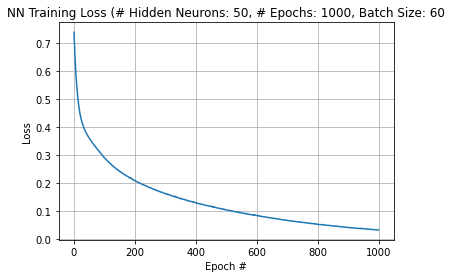

In [19]:
# TRAIN NEURAL NETWORK
NUM_EPOCHS=1000
BATCH_SIZE=60
history = model.fit(training_features, training_labels, verbose=0, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

# Plot the loss
xc = range(NUM_EPOCHS)
yc = history.history["loss"]

plt.plot(xc, yc)
plt.title(f"NN Training Loss (# Hidden Neurons: {HIDDEN_SIZE}, # Epochs: {NUM_EPOCHS}, Batch Size: {BATCH_SIZE}")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.grid(True)

print('Training phase ended with a loss of: ' + str(history.history["loss"][NUM_EPOCHS-1]))

Test the model now that it has been trained and display confusion matrices for training and testing

Recall format of confusion matrix:
||1 - increased chance heart attack (actual)|0 - decreased chance heart attack (actual)|
| ------ | ------ | ------ |
|**1 (predicted)**| <span style="color:green">true positive</span>|<span style="color:red">false negative</span>|
|**0 (predicted)**| <span style="color:red">false positive</span>|<span style="color:green">true negative</span>|

In [21]:
training_predictions = model.predict(training_features)
#print("\n\nPREDICTIONS (training data)")
#print("=======")
#print("Raw Training Predictions:")
#print(training_predictions[:5])
training_predictions_classified = np.argmax(training_predictions, axis=1)
#print("\nProcessed Training Predictions (softmax'd columns ran thru argmax):")
#print(training_predictions_classified[:5])
observed = np.argmax(np.array(training_labels), axis=1)

print("\nPERFORMANCE (training data)")
print(f"Confusion Matrix:\n{confusion_matrix(training_predictions_classified, observed)}")
print(f"Accuracy Score: {accuracy_score(training_predictions_classified, observed)}")

# make predictions for test data
testing_predictions = model.predict(testing_features)
#print("\n\nPREDICTIONS (testing data)")
#print("=======")
#print("Raw Testing Predictions:")
#print(testing_predictions[:5])
testing_predictions_classified = np.argmax(testing_predictions, axis=1)
#print("\nProcessed Testing Predictions (softmax'd columns ran thru argmax):")
#print(testing_predictions_classified[:5])
observed = np.argmax(np.array(testing_labels), axis=1)

print("\n\nPERFORMANCE (testing data)")
print(f"Confusion Matrix:\n{confusion_matrix(testing_predictions_classified, observed)}")
print(f"Accuracy Score: {accuracy_score(testing_predictions_classified, observed)}")


PERFORMANCE (training data)
Confusion Matrix:
[[101   0]
 [  1 110]]
Accuracy Score: 0.9952830188679245


PERFORMANCE (testing data)
Confusion Matrix:
[[29  8]
 [ 7 47]]
Accuracy Score: 0.8351648351648352
